In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [207]:
df_r = pd.read_csv("./MIDA_4.2.csv", index_col=False, na_values="-9") #For index_col see dispnum

In [208]:
df_r.head()

df_r.describe()
df_r.columns


Index(['dispnum3', 'dispnum4', 'stday', 'stmon', 'styear', 'endday', 'endmon',
       'endyear', 'outcome', 'settle', 'fatality', 'fatalpre', 'maxdur',
       'mindur', 'hiact', 'hostlev', 'recip', 'numa', 'numb', 'link1', 'link2',
       'link3', 'ongo2010', 'version', 'changes_1', 'changes_2'],
      dtype='object')

In [209]:
# dispnum3 could serve as id (all unique)
df = df_r.drop(['version', 'changes_1', 'changes_2', 'ongo2010', 'link1', 'link2', 'link3', 'stday', 'endday', 'fatalpre', 'dispnum3', 'dispnum4'],axis=1)

# drop redundand information
df = df.drop(['endyear', 'endmon', 'mindur'], axis=1) #TODO: Add avgdur?

df.head()

,stmon,styear,outcome,settle,fatality,maxdur,hiact,hostlev,recip,numa,numb
0,7,1902,6.0,1.0,0.0,208,7,3,0,1,1
1,5,1913,4.0,3.0,0.0,177,8,3,0,1,1
2,5,1946,5.0,3.0,2.0,183,16,4,1,1,1
3,10,1951,1.0,3.0,2.0,106,17,4,1,1,1
4,7,1856,1.0,2.0,6.0,257,20,5,1,1,1


In [210]:
cat = ['stmon', 'outcome', 'settle', 'fatality', 'hiact', 'hostlev', 'recip']
for c in cat:
    df[c] = pd.Categorical(df[c].astype(str))
    
df.corr()

,styear,maxdur,numa,numb
styear,1.000000,-0.054575,-0.037046,-0.021498
maxdur,-0.054575,1.000000,0.168124,0.140711
numa,-0.037046,0.168124,1.000000,0.090013
numb,-0.021498,0.140711,0.090013,1.000000


In [211]:
df['outcome'].describe()


count     2292
unique      10
top        5.0
freq      1524
Name: outcome, dtype: object

In [212]:
pd.Categorical(df['settle']).describe()
# 3 -> None :(

,counts,freqs
categories,,
1.0,359,0.156632
2.0,150,0.065445
3.0,1699,0.741274
4.0,64,0.027923
nan,20,0.008726


In [213]:
pd.Categorical(df['outcome'][df['settle'] == "3.0"]).describe()


,counts,freqs
categories,,
1.0,11,0.006474
2.0,7,0.004120
3.0,26,0.015303
4.0,50,0.029429
5.0,1447,0.851677
6.0,3,0.001766
7.0,93,0.054738
8.0,43,0.025309
9.0,19,0.011183


In [214]:
def rename_col(dta, col, mapping):
    dta[col] = pd.Categorical(dta[col]).rename_categories(mapping)

rename_col(df, 'stmon', {'1': 'Jan',
                            '2': 'Feb',
                            '3': 'Mar',
                            '4': 'Apr',
                            '5': 'May',
                            '6': 'Jun',
                            '7': 'Jul',
                            '8': 'Aug',
                            '9': 'Sep',
                            '10': 'Nov',
                            '11': 'Oct',
                            '12': 'Dec',
                           })

rename_col(df, 'outcome', {'1.0': 'Victory',
                              '2.0': 'VictoryB',
                              '3.0': 'Yield',
                              '4.0': 'YieldB',
                              '5.0': 'Stalemate',
                              '6.0': 'Compromise',
                              '7.0': 'Released',
                              '8.0': 'Unclear',
                              '9.0': 'JoinsWar',
                             })

rename_col(df, 'settle', {'1.0': 'Negotiated',
                             '2.0': 'Imposed',
                             '3.0': 'None',
                             '4.0': 'Unclear',
                            })

# is it correct to use values from heroes of might & magic?
rename_col(df, 'fatality', {'0.0': 'None',
                               '1.0': '1-25',      # 
                               '2.0': '26-100',     # 
                               '3.0': '101-250',     # 
                               '4.0': '251-500',     # 
                               '5.0': '501-999',    # 
                               '6.0': '>999', # > 
                              })

rename_col(df, 'hiact', {'1': 'NoMilitarizedAction',
                            '2': 'ForceThreat',
                            '3': 'BlockadeThreat',
                            '4': 'OccupyThreat',
                            '5': 'WarThreat',
                            '6': 'CBRWeaponsThreat',
                            '7': 'JoinWarThreat',
                            '8': 'ShowOfFOrce',
                            '9': 'Alert',
                            '10': 'NuclearAlert',
                            '11': 'Mobilization',
                            '12': 'FortifyBorder',
                            '13': 'BorderViolation',
                            '14': 'Blockade',
                            '15': 'Occupation',
                            '16': 'Seizure',
                            '17': 'Attack',
                            '18': 'Clash',
                            '19': 'WarDeclaration',
                            '20': 'CBRWeapons',
                            '21': 'BeginWar',
                            '22': 'JoinWar',
                           })

rename_col(df, 'hostlev', {'1': 'NoMilitarizedAction',
                              '2': 'ForceThreat',
                              '3': 'ForceDisplay',
                              '4': 'ForceUse',
                              '5': 'War',
                             })

rename_col(df, 'recip', {'0': 'no',
                            '1': 'yes',
                           })

In [215]:
# Can't rename two categories to one -> this hack 
df.loc[df['outcome']=='VictoryB', 'outcome'] = 'Victory'
df.loc[df['outcome']=='YieldB', 'outcome'] = 'Yield'

In [216]:
# Reorder columns
df = df[[c for c in df if c not in ['outcome']] + ['outcome']]
df.head()

,stmon,styear,settle,fatality,maxdur,hiact,hostlev,recip,numa,numb,outcome
0,Jul,1902,Negotiated,None,208,JoinWarThreat,ForceDisplay,no,1,1,Compromise
1,May,1913,None,None,177,ShowOfFOrce,ForceDisplay,no,1,1,Yield
2,May,1946,None,26-100,183,Seizure,ForceUse,yes,1,1,Stalemate
3,Nov,1951,None,26-100,106,Attack,ForceUse,yes,1,1,Victory
4,Jul,1856,Imposed,>999,257,CBRWeapons,War,yes,1,1,Victory


In [217]:
train_msk = np.random.rand(len(df)) < 0.8
train = df[train_msk]
test = df[~train_msk]

(len(train), len(test))

(1854, 438)

In [218]:
pd.Categorical(train['outcome']).describe()

,counts,freqs
categories,,
Victory,137,0.073894
VictoryB,0,0.000000
Yield,138,0.074434
YieldB,0,0.000000
Stalemate,1234,0.665588
Compromise,113,0.060949
Released,134,0.072276
Unclear,65,0.035059
JoinsWar,20,0.010787


In [219]:
pd.Categorical(test['outcome']).describe()

,counts,freqs
categories,,
Victory,35,0.079909
VictoryB,0,0.000000
Yield,45,0.102740
YieldB,0,0.000000
Stalemate,290,0.662100
Compromise,26,0.059361
Released,23,0.052511
Unclear,14,0.031963
JoinsWar,3,0.006849


In [220]:
train.to_csv('transformed_train.csv', index = None, header=True)
test.to_csv('transformed_test.csv', index = None, header=True)

In [290]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.graphics as stm

mpl.rc("figure", figsize=(8,5))
fig_ext = "png"



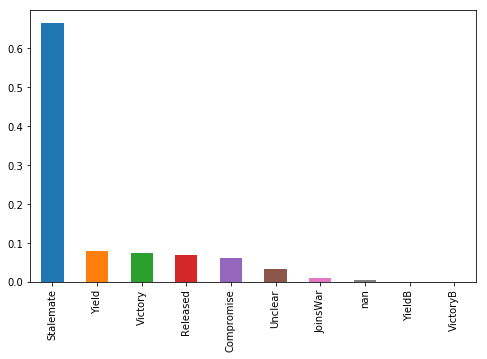

In [291]:
df['outcome'].value_counts(normalize=True).plot(kind='bar')
plt.savefig("1."+fig_ext)

In [292]:
df['settle'].describe()

count     2292
unique       5
top       None
freq      1699
Name: settle, dtype: object

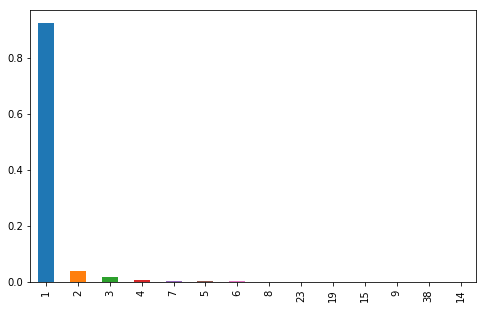

In [293]:
df['numa'].value_counts(normalize=True).plot(kind="bar")
plt.savefig("2."+fig_ext)

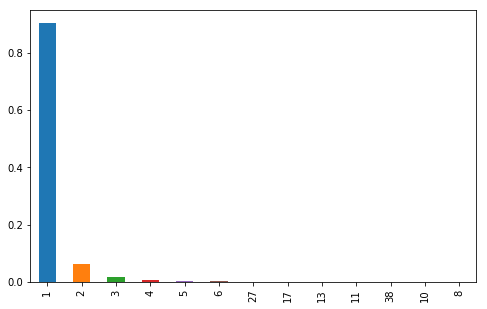

In [294]:
df['numb'].value_counts(normalize=True).plot(kind="bar")
plt.savefig("3."+fig_ext)

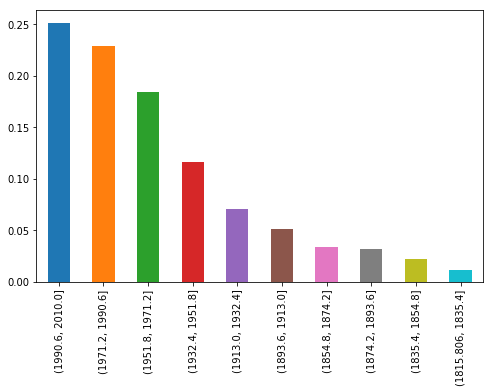

In [295]:
pd.cut(df['styear'], 10, duplicates='drop').value_counts(normalize=True).plot(kind="bar")
plt.savefig("4."+fig_ext)

In [296]:
pd.crosstab(df['outcome'], df['settle'])

<Figure size 576x360 with 0 Axes>

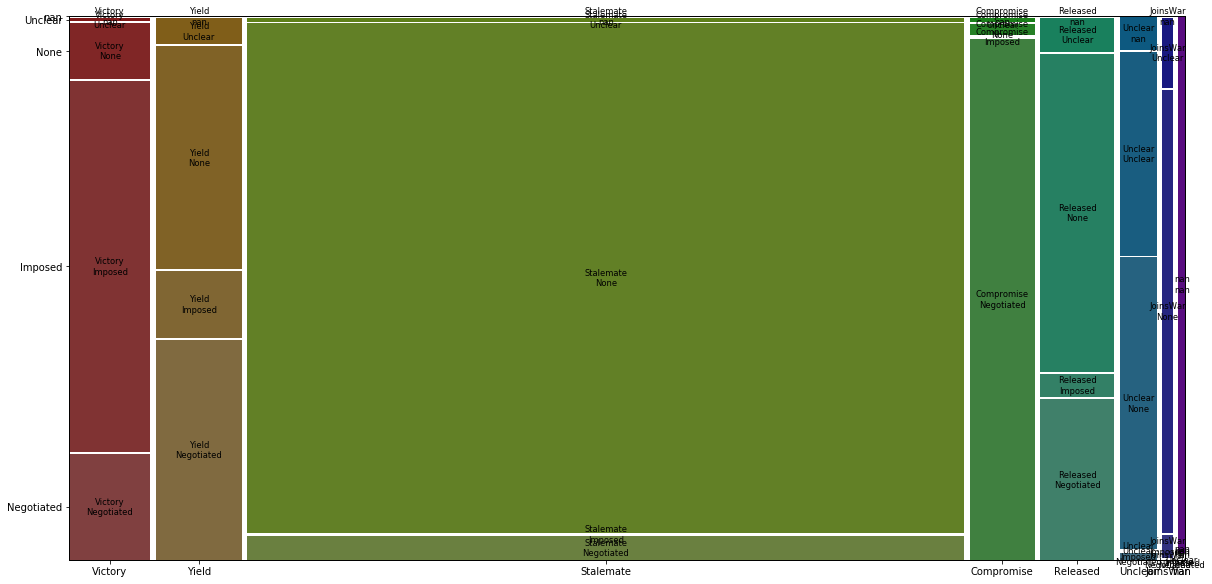

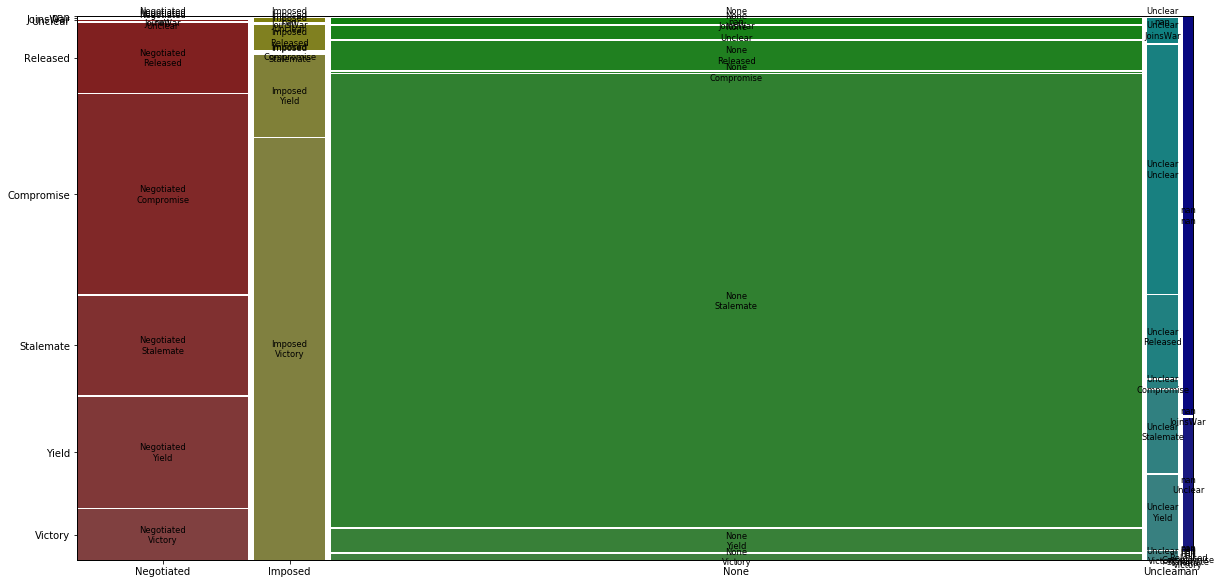

In [297]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(20,10))
    stm.mosaicplot.mosaic(pd.crosstab(df['outcome'], df['settle']).stack())
    plt.savefig("6_1."+fig_ext)
    
    stm.mosaicplot.mosaic(pd.crosstab(df['settle'], df['outcome']).stack())
    plt.savefig("6_2."+fig_ext)




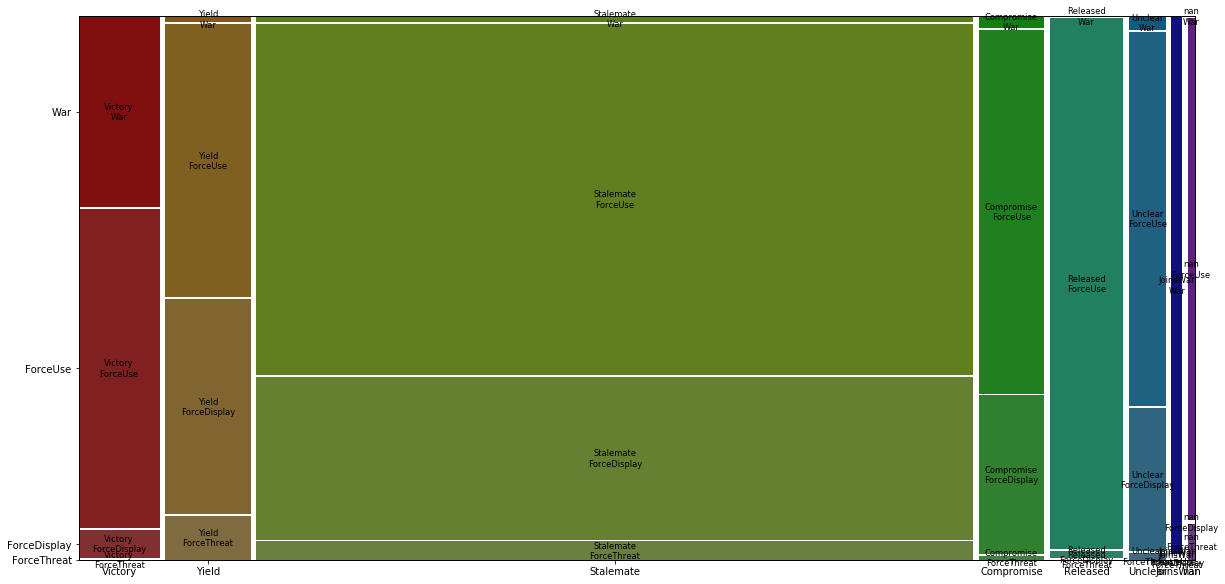

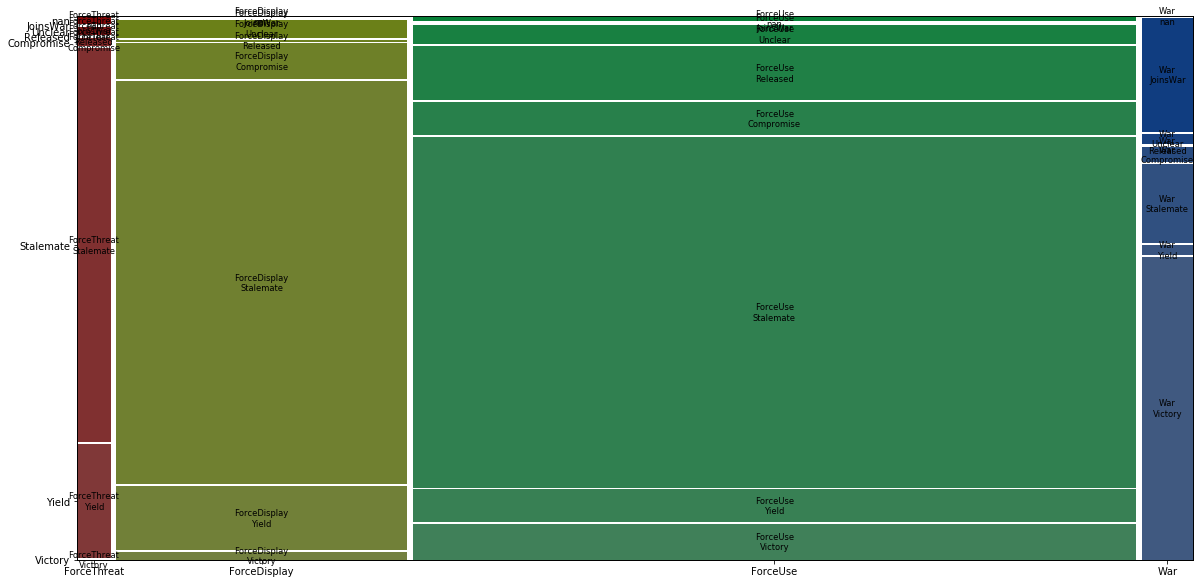

In [298]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(20,10))
    stm.mosaicplot.mosaic(pd.crosstab(df['outcome'], df['hostlev']).stack())
    plt.savefig("7_1."+fig_ext)
    
    stm.mosaicplot.mosaic(pd.crosstab(df['hostlev'], df['outcome']).stack())
    plt.savefig("7_2."+fig_ext)

In [299]:
df['hostlev'].describe()

count         2292
unique           4
top       ForceUse
freq          1508
Name: hostlev, dtype: object

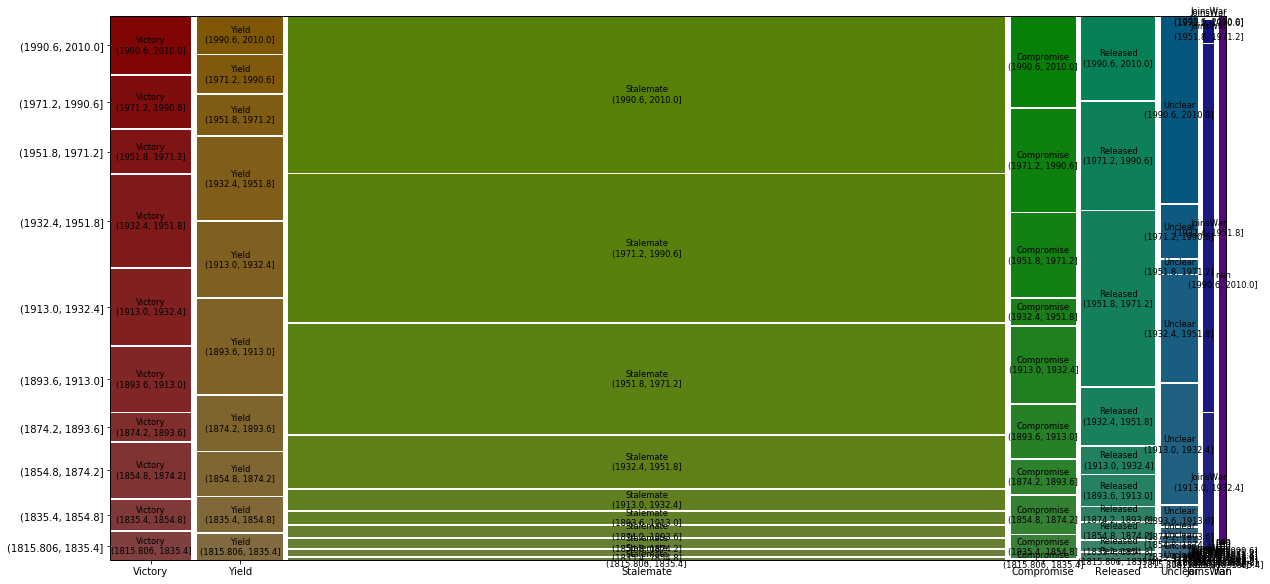

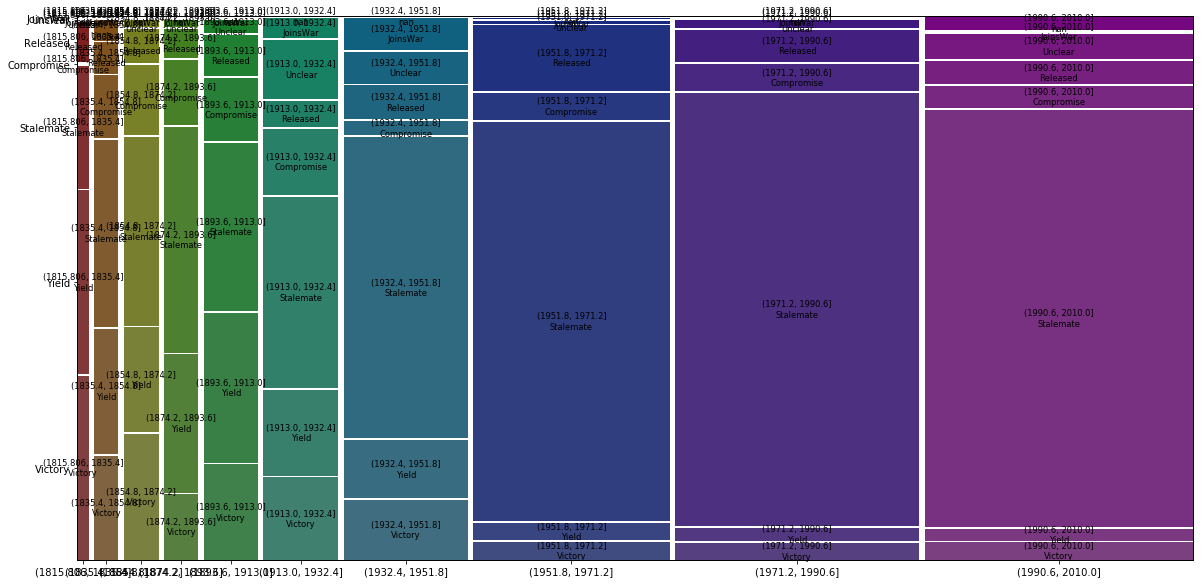

In [300]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(20,10))
    stm.mosaicplot.mosaic(pd.crosstab(df['outcome'], pd.cut(df['styear'], 10, duplicates='drop')).stack())
    plt.savefig("8_1."+fig_ext)
    stm.mosaicplot.mosaic(pd.crosstab(pd.cut(df['styear'], 10, duplicates='drop'), df['outcome']).stack())
    plt.savefig("8_2."+fig_ext)

